# BI Exam: Simple Data Science

## Question 1

In [227]:
import numpy as np
import pandas as pd

In [228]:
df = pd.read_excel('q1_source.xlsx')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Week        15 non-null     int64  
 1   Price       15 non-null     float64
 2   Ads_Budget  15 non-null     int64  
 3   Sales       15 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 608.0 bytes


In [230]:
df.describe()

,Week,Price,Ads_Budget,Sales
count,15.000000,15.000000,15.000000,15.000000
mean,8.000000,13.960000,2064.333333,1314.000000
std,4.472136,2.450015,1144.369550,306.140724
min,1.000000,9.600000,1000.000000,800.000000
25%,4.500000,12.000000,1000.000000,1062.500000
50%,8.000000,14.300000,2000.000000,1240.000000
75%,11.500000,15.700000,3000.000000,1560.000000
max,15.000000,18.200000,4000.000000,1895.000000


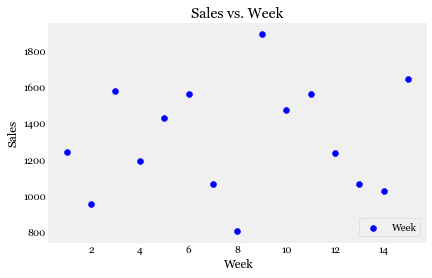

In [231]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df.Week, df.Sales, color='blue', label="Week")

plt.legend(loc="lower right")
plt.title("Sales vs. Week")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid()
plt.show()

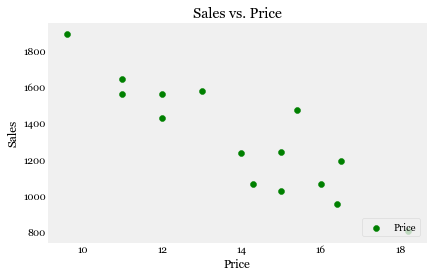

In [232]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df.Price, df.Sales, color='green', label='Price')

plt.legend(loc="lower right")
plt.title("Sales vs. Price")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.grid()
plt.show()

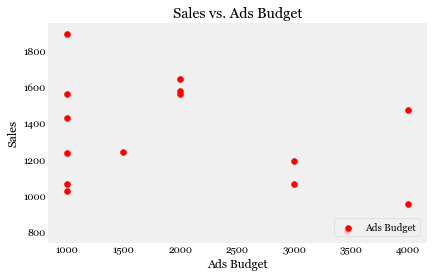

In [233]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df['Ads_Budget'], df.Sales, color='red', label='Ads Budget')

plt.legend(loc="lower right")
plt.title("Sales vs. Ads Budget")
plt.xlabel("Ads Budget")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [234]:
df.corr()

,Week,Price,Ads_Budget,Sales
Week,1.000000,-0.177972,-0.118634,0.101474
Price,-0.177972,1.000000,0.659623,-0.888665
Ads_Budget,-0.118634,0.659623,1.000000,-0.370257
Sales,0.101474,-0.888665,-0.370257,1.000000


### Check Relationships

In [235]:
import statsmodels.formula.api as sm

In [236]:
modelAll = sm.ols('Sales ~ Price + Ads_Budget', df).fit()
modelAll.params

Intercept     3092.883488
Price         -142.548449
Ads_Budget       0.102257
dtype: float64

### Testing for Usefulness in Predicting Sales

In [237]:
y_pred = modelAll.predict(df)
import numpy as np
RSS = np.sum((y_pred - df.Sales)**2)
RSS

167604.91569699172

In [238]:
y_mean = np.mean(df.Sales) # mean of sales
TSS = np.sum((df.Sales - y_mean)**2)
TSS

1312110.0

In [239]:
p=2 # we have two predictors
n=15 # we have 15 data points

F = ((TSS-RSS)/p) / (RSS/(n-p-1))
F

40.97153402250304

### Checking the Strength of Relationship

In [240]:
RSE = np.sqrt((1/(n-2))*RSS); 
RSE

113.54596348107457

In [241]:
np.mean(df.Sales)

1314.0

In [242]:
R2 = 1 - RSS/TSS; 
R2

0.8722630604926479

### Summary

In [243]:
modelAll.summary()

/Users/williamandrewbulaquena/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     40.97
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           4.34e-06
Time:                        23:17:00   Log-Likelihood:                -91.194
No. Observations:                  15   AIC:                             188.4
Df Residuals:                      12   BIC:                             190.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3092.8835    200.170     15.451      0.000    2656.750    3529.017
Price       -142.5484     17.153     -8.311      0.000    -179.921    -105.176
Ads_Budget     0.1023      0.037      2.785      0.017       0.022       0.182
==============================================================================
Omnibus:                        0.173   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.379
Skew:                           0.038   Prob(JB):                        0.827
Kurtosis:                       2.225   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
print(modelAll.f_test("Price = Ads_Budget = 0"))

<F test: F=array([[40.97153402]]), p=4.344092249850941e-06, df_denom=12, df_num=2>


## Question 2

In [122]:
# import the library PuLP as p 
import pulp as p

In [123]:
# Set Up a LP Maximization Problem:
Lp_prob = p.LpProblem('Question 2', p.LpMaximize) # Here we named the Problem "Question 2".

# Set Up Problem Variables:
a = p.LpVariable("a", lowBound = 0) # for KERC 501
b = p.LpVariable("b", lowBound = 0) # for KERC 601

/Users/williamandrewbulaquena/opt/anaconda3/lib/python3.8/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [124]:
# Create Objective Function:
Lp_prob += 4.9 * a + 5.8 * b

# Create Constraints: 
Lp_prob += 8 * a + 10 * b <= 10800
Lp_prob += 4 * a + 3 * b <= 4500
Lp_prob += 2 * a + 1.6 * b <= 2500

In [125]:
# Show the problem:
print(Lp_prob) # note that it's shown in alphabetical order

Question_2:
MAXIMIZE
4.9*a + 5.8*b + 0.0
SUBJECT TO
_C1: 8 a + 10 b <= 10800

_C2: 4 a + 3 b <= 4500

_C3: 2 a + 1.6 b <= 2500

VARIABLES
a Continuous
b Continuous



In [126]:
# Solve the Problem:
status = Lp_prob.solve()
print(p.LpStatus[status])

Optimal


In [127]:
# Printing the final solution 
print(p.value(a), p.value(b), p.value(Lp_prob.objective))

787.5 450.0 6468.75


In [128]:
# Printing Number of Chairs and Tables:
for var in (a,b):
    print('Optimal number of {} to produce is: {:1.0f}'
          .format(var.name, var.value()))

Optimal number of a to produce is: 788
Optimal number of b to produce is: 450


## Question 3

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import style
from scipy.stats import norm

# Styles
style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['font.family'] = 'Georgia'
plt.rcParams['font.size'] = 18

In [213]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [214]:
# Load Data
data = pd.read_excel('q3_source.xlsx')
data = data.set_index('date')
usage = data['usage'].resample('M').sum()

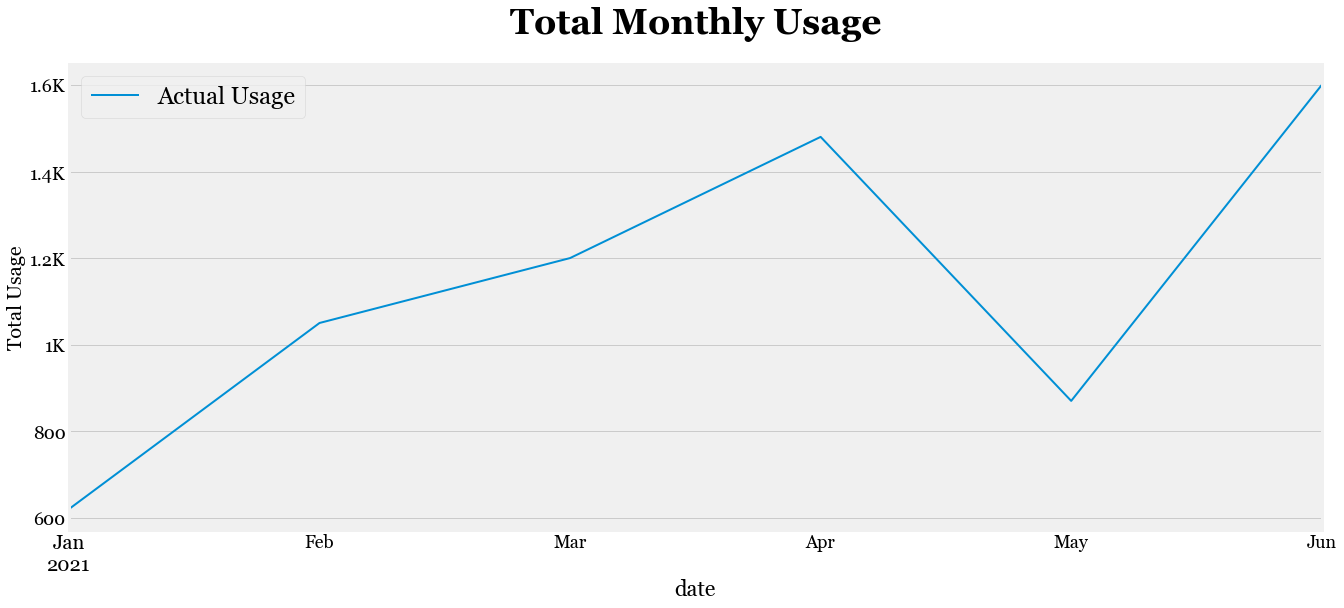

In [215]:
# Usage

fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Total Monthly Usage', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Usage', fontsize=20)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

for t in ax.xaxis.get_major_ticks():
    t.label.set_fontsize(20) 

data['usage'].plot(ax=ax, linewidth=2, label="Actual Usage")
ax.legend(fontsize=24)

Text(0.5, 1.0, 'Distribution of Monthly Usage')

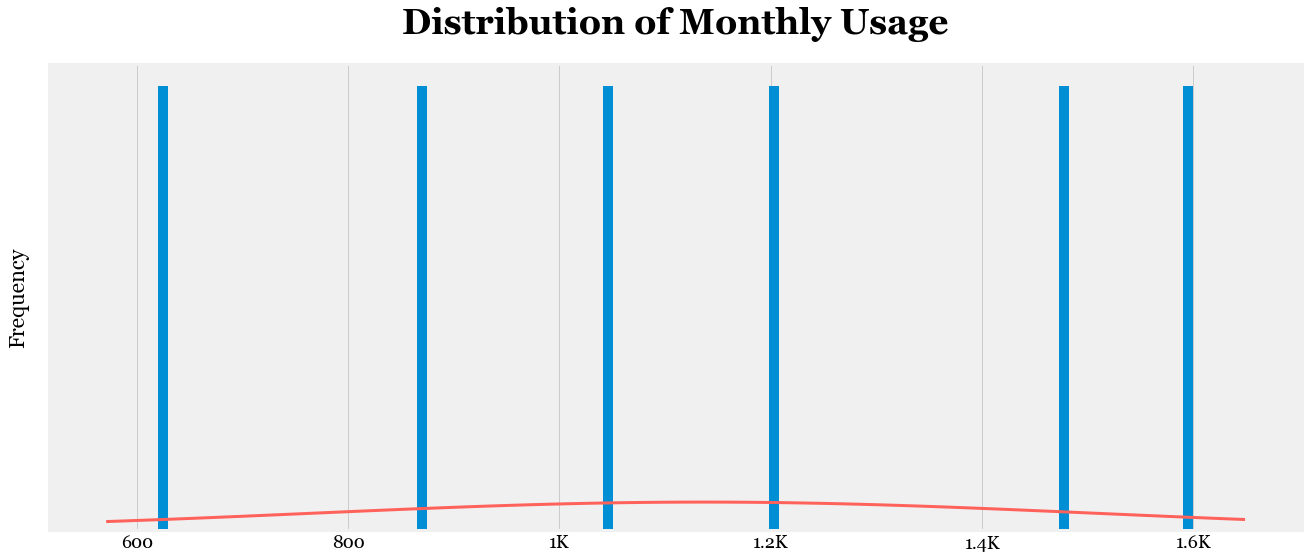

In [216]:
# Distribution of Monthly Usage
fig, ax = plt.subplots(figsize=(20,8))

usage.plot.hist(bins=100, density=True, ax=ax)

# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, usage.mean(), usage.std())
ax.plot(x, p, color='#FF625B', linewidth=3)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

ax.set_yticks([])
ax.set_ylabel('Frequency', labelpad=20)
ax.set_title('Distribution of Monthly Usage', fontsize=35, fontweight='bold', pad=30)

Text(0.5, 1.05, 'Simulate Random Walks')

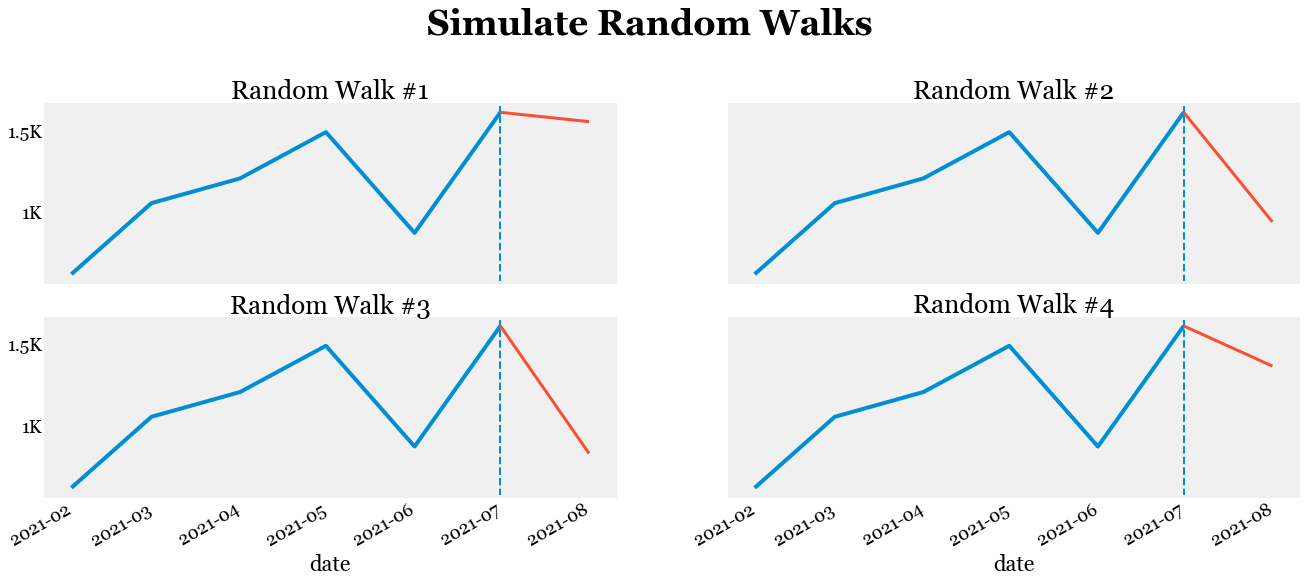

In [217]:
# A random walk
last_sale = usage[-1]
num_weeks = 1

mu = usage.mean()
std = usage.std()

index = pd.date_range('2021-06-01', periods=2, freq='M')

def make_sim_plot(ax=ax, title=''):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std)
        if weekly_sales < 0:
            weekly_sales = 0
        sales_series.append(weekly_sales)
    s = pd.Series(sales_series, index=index)
    ax.set_title(title)
    ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
    ax.axvline(x=s.index.min(), linestyle='dashed', linewidth=2)

    usage[-52:].plot(ax=ax)
    s.plot(ax=ax, linewidth=3)

    
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20,8))

make_sim_plot(ax1, title='Random Walk #1')
make_sim_plot(ax2, title='Random Walk #2')
make_sim_plot(ax3, title='Random Walk #3')
make_sim_plot(ax4, title='Random Walk #4')
ax2.set_yticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_xlabel('')
ax1.set_xticks([])
ax1.set_xlabel('')

ax1.grid(None)
ax2.grid(None)
ax3.grid(None)
ax4.grid(None)

fig.suptitle('Simulate Random Walks', fontsize=35, fontweight='bold', y=1.05)

Text(0.5, 0.98, 'Simulations of 1,000 Random Walks')

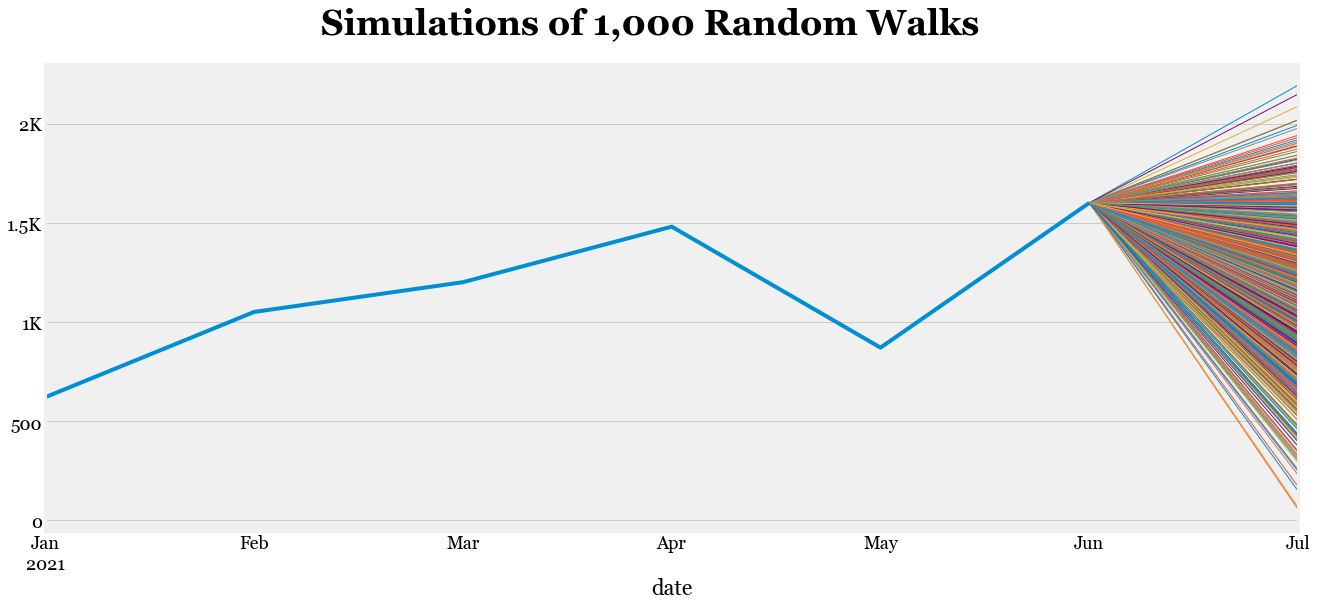

In [218]:
# Many, many random walks
num_simulations = 1000
num_weeks = 1

last_sale = usage[-1]
mu = usage.mean()
std = usage.std()

index = pd.date_range('2021-06-01', periods=2, freq='M')

simulation_df = pd.DataFrame()

sales_2018 = []

for sim in range(num_simulations):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std)
        if weekly_sales < 0:
            weekly_sales = 0
        sales_series.append(weekly_sales)
    
    sales_2018.append(np.sum(sales_series))
    simulation_df[sim] = sales_series

simulation_df.index = index

fig, ax = plt.subplots(figsize=(20,8))
usage[-52:].plot(ax=ax)
simulation_df.plot(ax=ax, legend=False, linewidth=1)

ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Simulations of 1,000 Random Walks', fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'Monthly Usage Simulation')

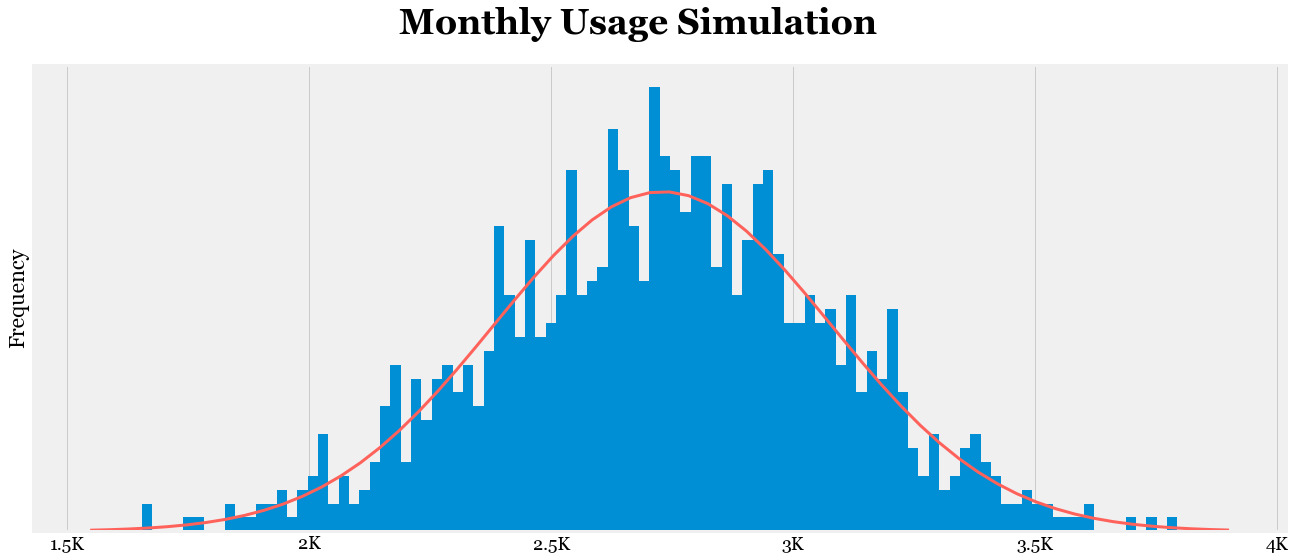

In [220]:
#Random walk monthly usage

fig, ax = plt.subplots(figsize=(20,8))
simulations_2018 = pd.Series(data=sales_2018)
simulations_2018.plot.hist(bins=100, ax=ax, density=True)

# Plot the pdf
xmin, xmax = plt.xlim()
mean = simulations_2018.mean()
std = simulations_2018.std()

x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mean, std)
ax.plot(x, p, color='#FF625B', linewidth=3)
ax.set_yticks([])
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Monthly Usage Simulation', fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'Monthly Usage Normal Distribution')

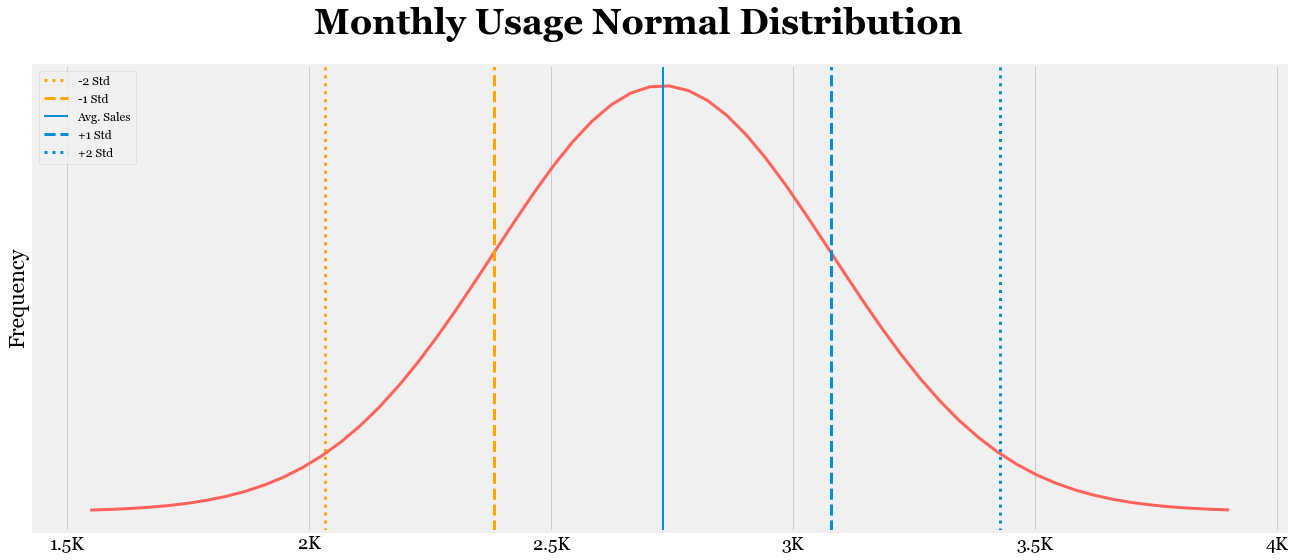

In [221]:
# Monthly Usage normal distribution
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, p, color='#FF625B', linewidth=3)

ax.set_yticks([])
ax.set_ylabel('Frequency')

ax.axvline(mean - (std * 2), linewidth=3, label='-2 Std', linestyle='dotted', color='orange')
ax.axvline(mean - std, linewidth=3, label='-1 Std', linestyle='dashed', color='orange')
ax.axvline(mean, linewidth=2, label="Avg. Sales")
ax.axvline(mean + std, linewidth=3, label='+1 Std', linestyle='dashed')
ax.axvline(mean + (std * 2), linewidth=3, label='+2 Std', linestyle='dotted')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.legend(fontsize=12, loc='upper left')
fig.suptitle('Monthly Usage Normal Distribution', fontsize=35, fontweight='bold')

In [226]:
# Ask Questions

from scipy.stats import norm
#mean + std * norm.
#mean + (std * norm.ppf(.25))
print("It's highly likely that monthly usage will be between {:,.0f} GB and {:,.0f} GB.".format(mean + (2 * -std), mean + (2 * std)))
print("There's a 25% chance that monthly usage will be less than {:,.0f} GB.".format(mean + (std * norm.ppf(.25))))

It's highly likely that monthly usage will be between 2,033 GB and 3,428 GB.
There's a 25% chance that monthly usage will be less than 2,495 GB.
